### Reading the data for the graphs from the excel Sheet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import numpy as np

## make sure you have this excel sheet in the same folder, or change the path then of the file
pathGoldStandards = "ToBeAnnotatedSentences - merged -evaluation included.xlsx"

dfPairEvaluationGold = pd.read_excel(pathGoldStandards)

data = dfPairEvaluationGold['Final_1st'][dfPairEvaluationGold['Final_1st'].notna()]

### Pie Chart Code

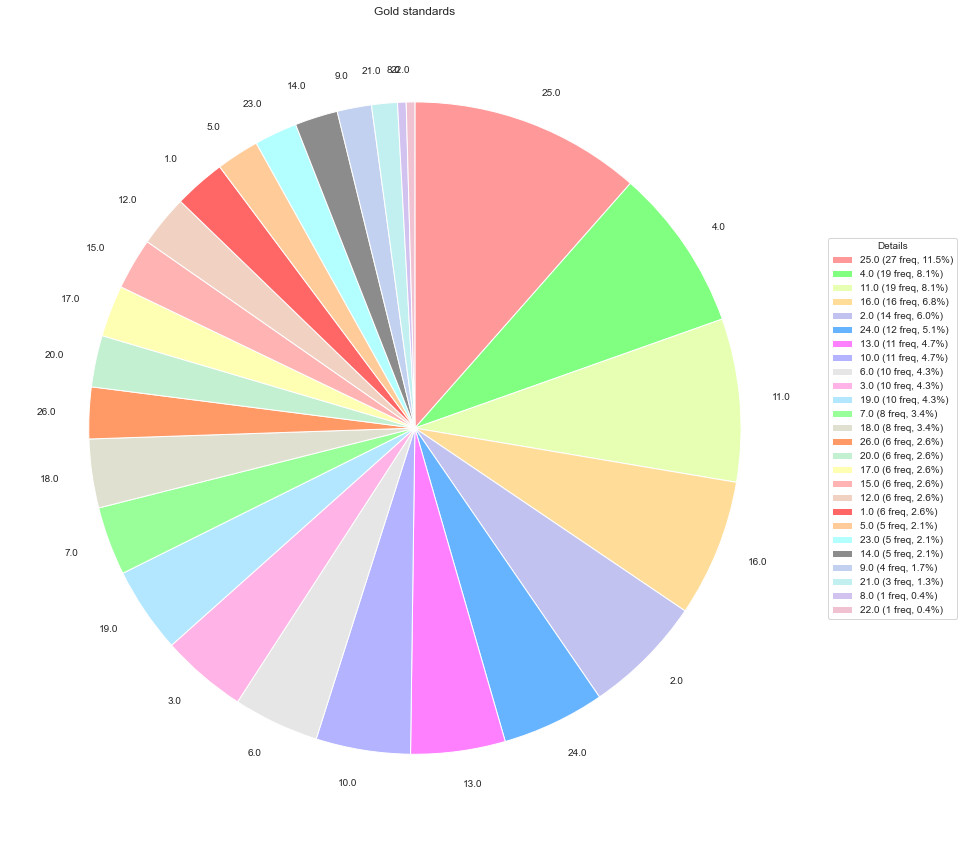

In [2]:
# Count the frequency of each number using the Counter object from the collections module
counter = collections.Counter(data)

# Get the labels and data for the pie chart
labels = [str(num) for num in counter.keys()]
data = list(counter.values())

# Set a fixed color for each label
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#b3e6ff', '#e6ffb3', '#e0e0d1', '#ff80ff', '#ff6666', '#8c8c8c', '#ff9966', '#ffdd99', '#ffffb3', '#b3ffff', '#80ff80', '#ffb3b3', '#b3b3ff', '#e6e6e6', '#c2d1f0', '#c2f0d1', '#f0d1c2', '#d1c2f0', '#f0c2d1', '#c2f0f0']

# Sort the data and labels by size from largest to smallest
data, labels, colors = zip(*sorted(zip(data, labels, colors), reverse=True))

# Calculate the percentage of each slice
percentages = [100 * count / sum(data) for count in data]

# Set the figure size
plt.figure(figsize=(15, 15))

# Create a pie chart
plt.pie(data, labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Create a legend
legend_text = [f'{label} ({count} freq, {percent:.1f}%)' for label, count, percent in zip(labels, data, percentages)]
plt.legend(legend_text, title='Details', loc='center left', bbox_to_anchor=(1, 0.5))

# Add a title to the chart
plt.title('Gold standards')

# Show the chart
plt.show()


### Stacked bars code

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_28984\3939391841.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


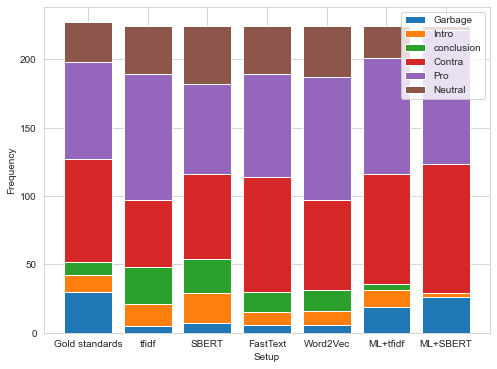

In [3]:
# 7 lists of data
data = [
    dfPairEvaluationGold['ProConLabel'][dfPairEvaluationGold['ProConLabel'].notna()].tolist(), ## goldstandards
    dfPairEvaluationGold['tfidf_merged'][dfPairEvaluationGold['tfidf_merged'].notna()].tolist(),
    dfPairEvaluationGold['sbert_merged'][dfPairEvaluationGold['sbert_merged'].notna()].tolist(),
    dfPairEvaluationGold['fast_merged'][dfPairEvaluationGold['fast_merged'].notna()].tolist(),
    dfPairEvaluationGold['word2Vec_merged'][dfPairEvaluationGold['word2Vec_merged'].notna()].tolist(),
    dfPairEvaluationGold['ML_tfidf_merged'][dfPairEvaluationGold['ML_tfidf_merged'].notna()].tolist(),
    dfPairEvaluationGold['ML_sbert_merged'][dfPairEvaluationGold['ML_sbert_merged'].notna()].tolist()
]
# Customized x-axis labels
labels = ['Gold standards', 'tfidf', 'SBERT', 'FastText', 'Word2Vec', 'ML+tfidf', 'ML+SBERT']

# Calculate the frequency of each number in each list
freqs = []
for lst in data:
    freq = [lst.count(i) for i in range(1, 7)]
    freqs.append(freq)

# Convert data and freqs to numpy arrays for plotting
data = np.array(data)
freqs = np.array(freqs)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the stacked bar chart
ax.bar(labels, freqs[:, 0], label='Garbage')
newlabels =['Intro', 'conclusion', 'Contra', 'Pro', 'Neutral']
for i in range(1, 6):
    ax.bar(labels, freqs[:, i], bottom=np.sum(freqs[:, :i], axis=1), label=newlabels[i-1])

# Add legend and axis labels
ax.legend()
ax.set_xlabel('Setup')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

### Zipf Diagramm

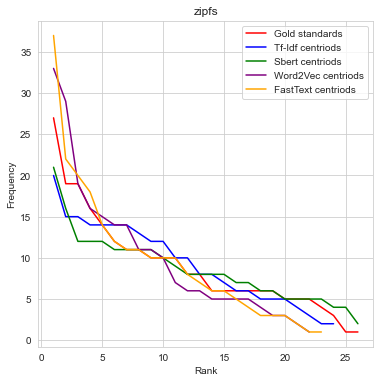

In [5]:
import collections
import matplotlib.pyplot as plt

# Define data for each diagram
data1 = dfPairEvaluationGold['Final_1st'][dfPairEvaluationGold['Final_1st'].notna()]
data2 = dfPairEvaluationGold['tf_centriods'][dfPairEvaluationGold['tf_centriods'].notna()] ## replace with tf-idf _Kmeans
data3 = dfPairEvaluationGold['sbert_centriods'][dfPairEvaluationGold['sbert_centriods'].notna()] ### replace with sbert _Kmeans
data4 = dfPairEvaluationGold['word2vec_centriods'][dfPairEvaluationGold['word2vec_centriods'].notna()] ### replace with word2vec_ Kmeans
data5 = dfPairEvaluationGold['Fast_centriods'][dfPairEvaluationGold['Fast_centriods'].notna()] ## replace with FastText_Kmeans

# Define titles for each diagram
titles = ['Gold standards', 'Tf-Idf centriods', 'Sbert centriods', 'Word2Vec centriods', 'FastText centriods']

# Define the color for each diagram
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot each diagram
for i, data in enumerate([data1, data2, data3, data4, data5]):
    # Count number frequencies
    number_freq = collections.Counter(data)

    # Sort dictionary in descending order of frequency
    number_freq = dict(sorted(number_freq.items(), key=lambda x: x[1], reverse=True))

    # Plot frequency distribution using a linear scale
    rank = range(1, len(number_freq) + 1)
    freq = list(number_freq.values())

    ax.plot(rank, freq, color=colors[i], label=titles[i])
    ax.set_xlabel('Rank')
    plt.title('zipfs')
    ax.set_ylabel('Frequency')

# Add legend and display the plot
ax.legend()
plt.show()
